In [40]:
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [41]:
df = pd.read_csv('AirPassengers.csv')
df.head(5)
df = df.rename(columns={'#Passengers': 'y', 'Month':'ds'})

In [42]:
df.tail(5)

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [43]:
df['y_orig'] = df['y']
print(df.head(5))

        ds    y  y_orig
0  1949-01  112     112
1  1949-02  118     118
2  1949-03  132     132
3  1949-04  129     129
4  1949-05  121     121


In [44]:
# to save a copy of the original data..you'll see why shortly.
df['y'] = np.log(df['y'])

In [45]:
df.head(5)

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121


In [46]:
model = Prophet() #instantiate Prophet
model.add_country_holidays(country_name='US')
model.fit(df)

#train_test_split: df: train/test, then run the code for train, compare the prediction vs test

18:59:07 - cmdstanpy - INFO - Chain [1] start processing
18:59:07 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
'''     'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''
#future_data = model.make_future_dataframe(periods=6, freq = 'H')
future_data = model.make_future_dataframe(periods=12, freq = 'ME')

In [48]:
forecast_data = model.predict(future_data)

In [49]:
forecast_data.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice Day,Armistice Day_lower,Armistice Day_upper,Christmas Day,...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
151,1961-07-31,6.274610,6.437339,6.533040,6.261502,6.285942,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.209377,0.209377,0.209377,0.0,0.0,0.0,6.483987
152,1961-08-31,6.283633,6.309459,6.410871,6.267847,6.297293,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.077400,0.077400,0.077400,0.0,0.0,0.0,6.361033
153,1961-09-30,6.292364,6.158223,6.254120,6.273148,6.309049,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.087349,-0.087349,-0.087349,0.0,0.0,0.0,6.205015
154,1961-10-31,6.301386,6.016090,6.122428,6.278554,6.320534,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.231086,-0.231086,-0.231086,0.0,0.0,0.0,6.070300
155,1961-11-30,6.310117,6.159441,6.261623,6.283489,6.332590,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.099021,-0.099021,-0.099021,0.0,0.0,0.0,6.211095


In [50]:

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
151,1961-07-31,6.483987,6.437339,6.533040
152,1961-08-31,6.361033,6.309459,6.410871
153,1961-09-30,6.205015,6.158223,6.254120
154,1961-10-31,6.070300,6.016090,6.122428
155,1961-11-30,6.211095,6.159441,6.261623


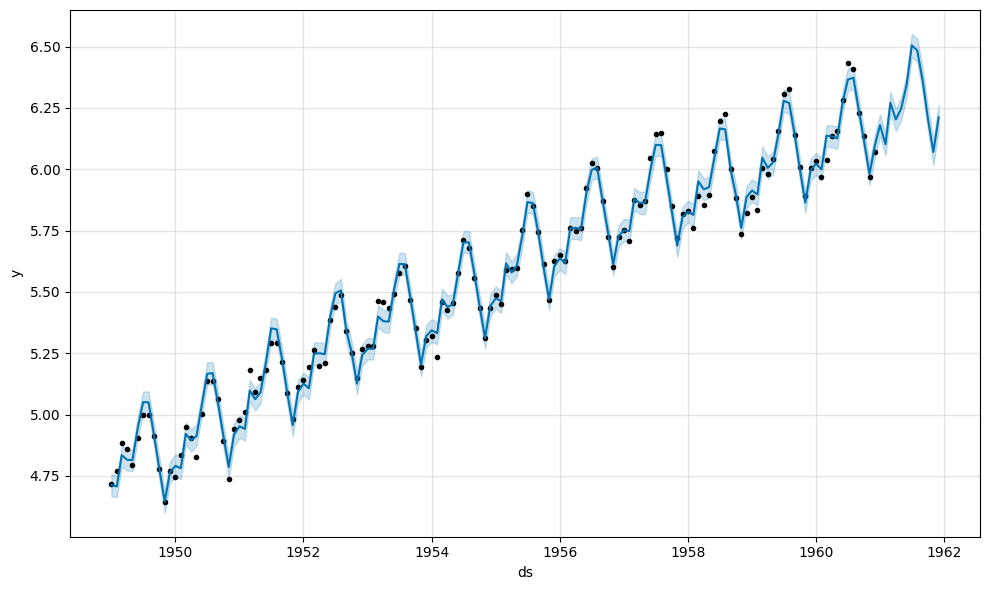

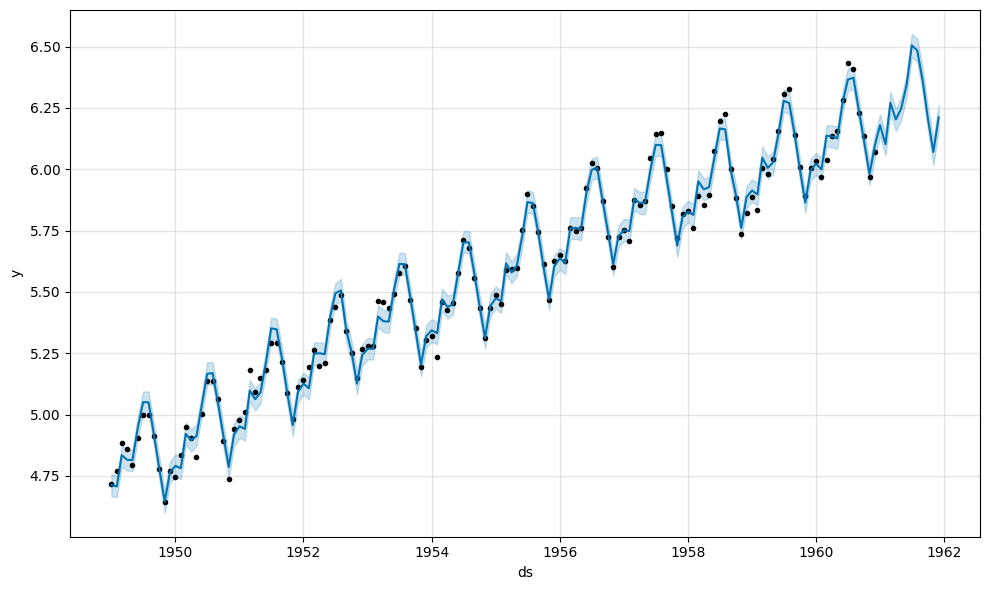

In [51]:
model.plot(forecast_data)

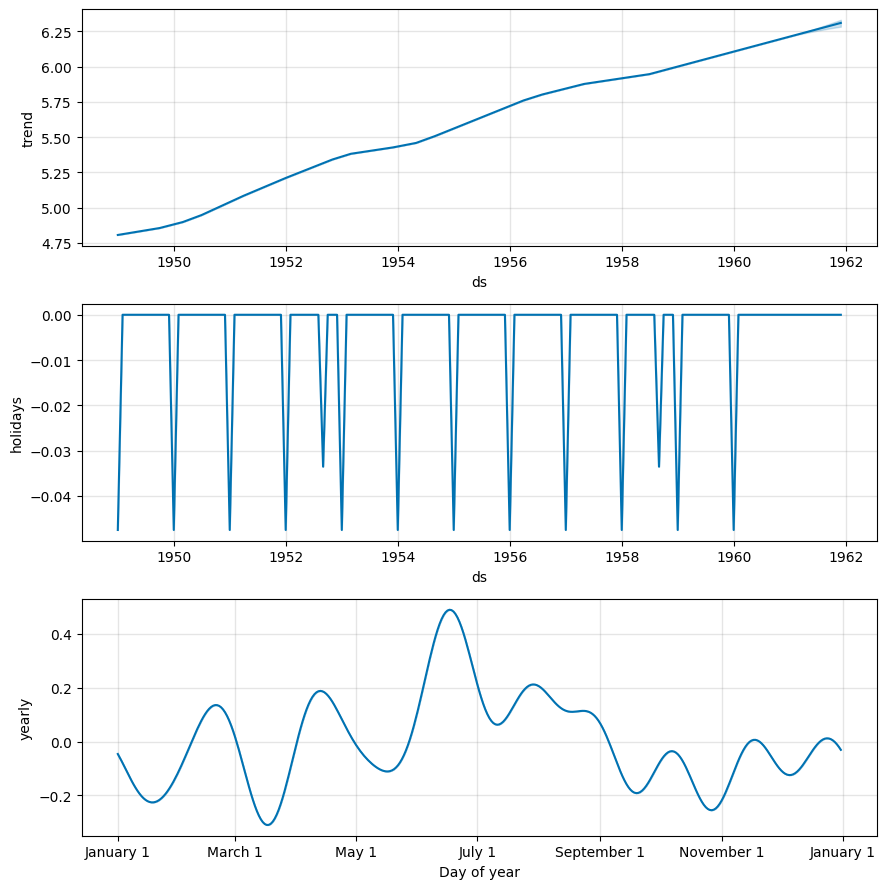

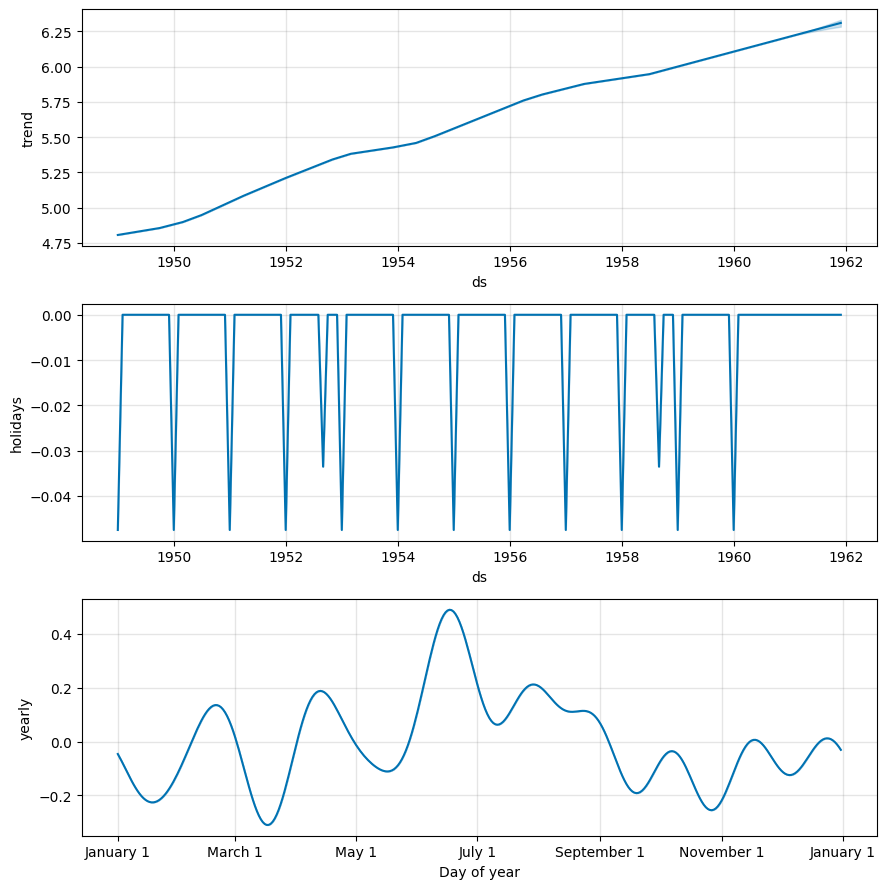

In [52]:
model.plot_components(forecast_data)

In [53]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

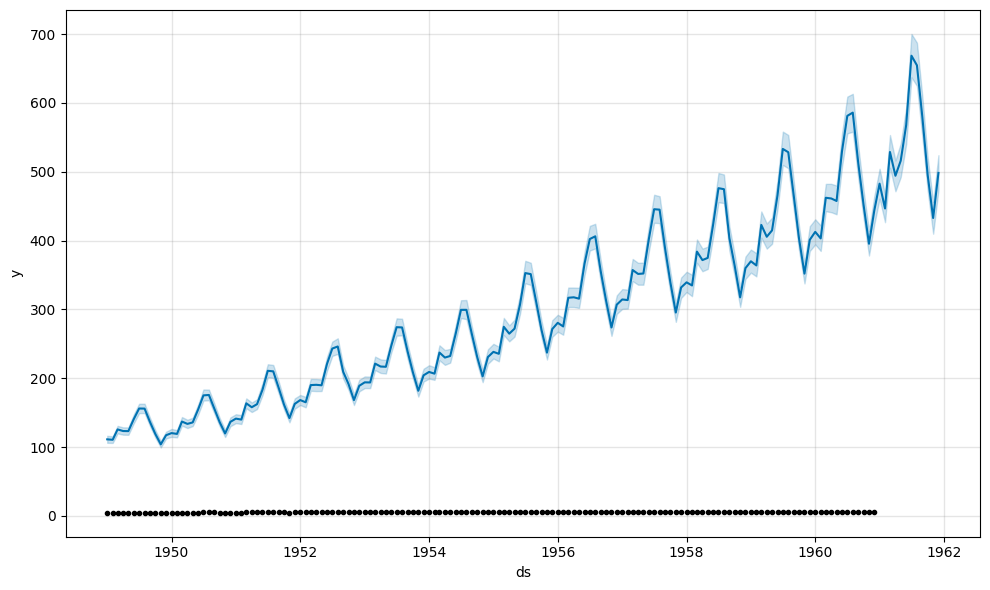

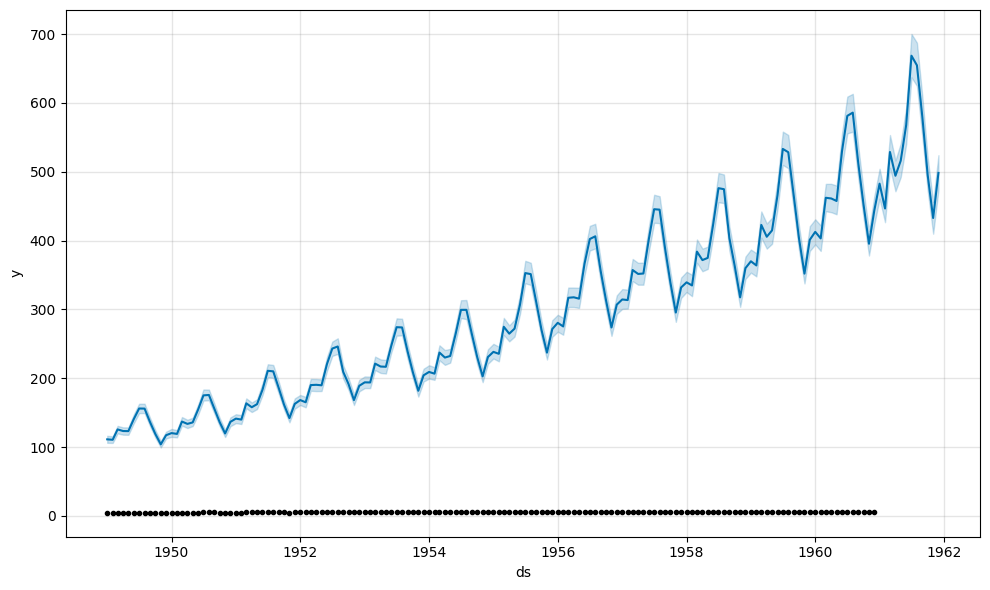

In [54]:
model.plot(forecast_data_orig)

In [55]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [56]:
final_df = pd.DataFrame(forecast_data_orig)

In [57]:
import plotly.graph_objs as go
import plotly.offline as py

In [58]:
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], image_width=400, image_height=400)
#py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower], filename = 'templates/' +'filename.html', auto_open=False)

'temp-plot.html'

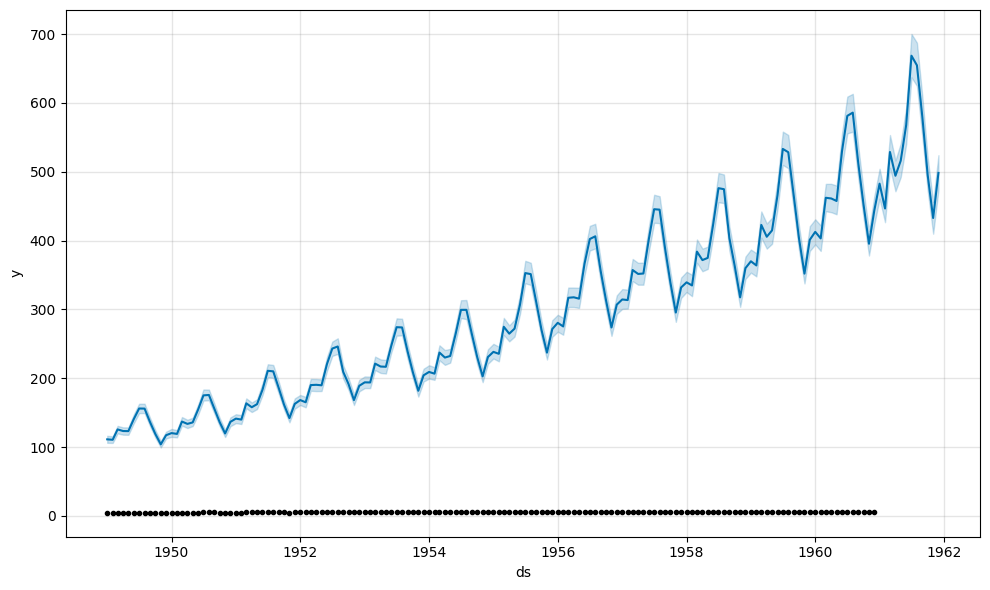

In [59]:
fig = model.plot(forecast_data)
fig.savefig('forecast.png')